In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk


In [2]:
df=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df["Text"][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
df.shape

(568454, 10)

In [6]:
df=df.head(500)
df.shape

(500, 10)

**Quick EDA**

In [7]:
df['Score']

0      5
1      1
2      4
3      2
4      5
      ..
495    5
496    5
497    4
498    4
499    5
Name: Score, Length: 500, dtype: int64

In [8]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

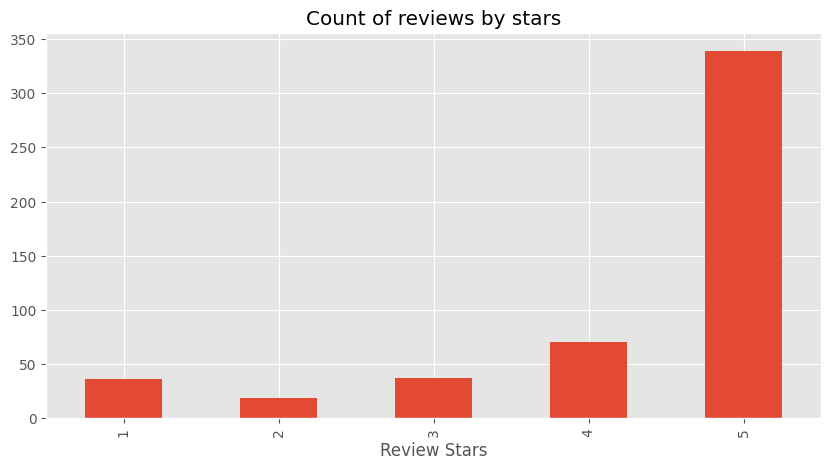

In [9]:
ax = df['Score'].value_counts().sort_index()\
.plot(kind='bar',
      title='Count of reviews by stars',
      figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
example=df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
tokens =nltk.word_tokenize(example)

In [12]:
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sia

In [ ]:
sia.polarity_scores('I am very hasspy')

In [ ]:
sia.polarity_scores('I am very sad')

In [ ]:
sia.polarity_scores(example)

In [ ]:
example=df.head(50)

In [ ]:
example

In [ ]:
sentiment_dic={}
for i, sentence in tqdm(example.iterrows(),total=len(example),desc="Analyzing Sentiment"):
    text=sentence["Text"]
    my_id=sentence["Id"]
    sentiment_dic[my_id]=sia.polarity_scores(text)

    
print("Sentiment score dict:",sentiment_dic)


In [ ]:
sentiment_dic

In [ ]:
pd.DataFrame(sentiment_dic).T

In [ ]:
amazon_df=pd.DataFrame(sentiment_dic).T

In [ ]:
amazon_df

In [ ]:
amazon_df=amazon_df.reset_index().rename(columns={'index':'Id'})
amazon_df=amazon_df.merge(df, how='left')

In [ ]:
amazon_df

In [ ]:
amazon_df.head()

#**Plot Amazon review results**

In [ ]:
ax = sns.barplot(data=amazon_df , x='Score', y='compound')
ax.set_title('Compund score by Amazon reviews')
plt.show()

In [ ]:
ax = sns.barplot(data=amazon_df , x='Score', y='pos')
ax.set_title('Postive score by Amazon reviews')
plt.show()

**Using a Higgingface pre-trained model**

In [15]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [16]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly 

In [17]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

# Running the Roberta Model

In [18]:
encoded_text=tokenizer(example, return_tensors='pt')
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.5818, -0.5665, -2.5625]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [19]:
encoded_text=tokenizer(example, return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
scores_dict

{'roberta_neg': 0.9535124,
 'roberta_neu': 0.040926374,
 'roberta_pos': 0.0055612465}

# Running the Pre-trained default Sentiment Analysis Model from Huggingface 

In [28]:
from transformers import pipeline
sentiment_pipeline=pipeline('sentiment-analysis')
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

2024-02-26 11:11:28.140250: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 11:11:28.140380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 11:11:28.286928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [30]:
amazon_sample=df.head(500)


In [20]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [22]:
amazon_sample=df.head(500)

In [24]:
Test_data=amazon_sample['Text']

In [25]:
processed_sentences=[]
for sentence in Test_data:
    processed_sentences.append(" ".join(simple_preprocess(sentence)))

In [51]:
processed_sentences[:10]

['have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like stew than processed meat and it smells better my labrador is finicky and she appreciates this product better than most',
 'product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo',
 'this is confection that has been around few centuries it is light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is tiny mouthful of heaven not too chewy and very flavorful highly recommend this yummy treat if you are familiar with the story of lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch',
 'if you are looking for the secret ingredient in robitussin believe have fou

In [48]:
specific_model= pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [49]:
data=specific_model(processed_sentences)

In [52]:
data[:10]

[{'label': 'positive', 'score': 0.95540851354599},
 {'label': 'negative', 'score': 0.6298890709877014},
 {'label': 'positive', 'score': 0.9315446615219116},
 {'label': 'positive', 'score': 0.939403235912323},
 {'label': 'positive', 'score': 0.9873508810997009},
 {'label': 'positive', 'score': 0.9515129923820496},
 {'label': 'positive', 'score': 0.9805946946144104},
 {'label': 'positive', 'score': 0.9880198836326599},
 {'label': 'positive', 'score': 0.921938419342041},
 {'label': 'positive', 'score': 0.9636136889457703}]

In [ ]:
label_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

for item in data:
    if item['label'] == 'positive':
        label_counts['positive'] += 1
    elif item['label'] == 'negative':
        label_counts['negative'] += 1
    else:
        label_counts['neutral'] += 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

x = np.arange(len(labels))

plt.bar(x, counts, color=['green', 'red', 'blue'])
plt.xticks(x, labels)
plt.ylabel('Counts')
plt.title('Label Counts')
plt.show()

In [39]:
specific_model_bert = pipeline(model='nlptown/bert-base-multilingual-uncased-sentiment')

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [60]:
data_bert=specific_model_bert(processed_sentences)

In [42]:
data_bert

[{'label': '5 stars', 'score': 0.654121458530426},
 {'label': '1 star', 'score': 0.5860545039176941},
 {'label': '5 stars', 'score': 0.6498227715492249},
 {'label': '4 stars', 'score': 0.39901813864707947},
 {'label': '5 stars', 'score': 0.648881733417511},
 {'label': '4 stars', 'score': 0.6752821803092957},
 {'label': '5 stars', 'score': 0.7518597841262817},
 {'label': '5 stars', 'score': 0.7224434614181519},
 {'label': '4 stars', 'score': 0.3105098605155945},
 {'label': '4 stars', 'score': 0.4884560704231262},
 {'label': '5 stars', 'score': 0.2904944121837616},
 {'label': '2 stars', 'score': 0.29591071605682373},
 {'label': '2 stars', 'score': 0.4059350788593292},
 {'label': '5 stars', 'score': 0.6440452337265015},
 {'label': '5 stars', 'score': 0.7421166300773621},
 {'label': '5 stars', 'score': 0.8205293416976929},
 {'label': '4 stars', 'score': 0.5431962609291077},
 {'label': '5 stars', 'score': 0.6947285532951355},
 {'label': '1 star', 'score': 0.3935324251651764},
 {'label': '5 

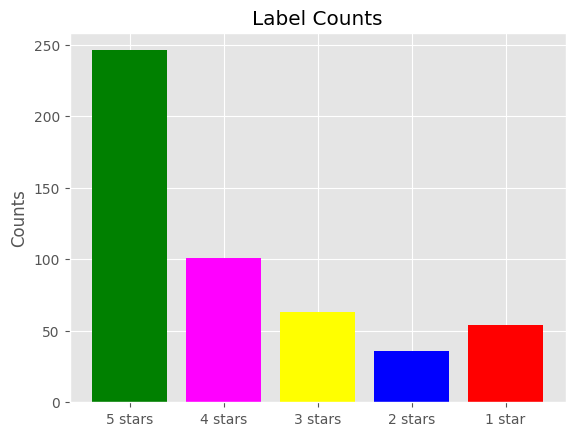

In [61]:
label_counts = {'5 stars': 0, '4 stars': 0, '3 stars': 0, '2 stars': 0, '1 star':0}

for item in data_bert:
    if item['label'] == '5 stars':
        label_counts['5 stars'] += 1
    elif item['label'] == '4 stars':
        label_counts['4 stars'] += 1
    elif item['label'] == '3 stars':
        label_counts['3 stars'] += 1
    elif item['label'] == '2 stars':
        label_counts['2 stars'] += 1
    else:
        label_counts['1 star'] += 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

x = np.arange(len(labels))

plt.bar(x, counts, color=['green', 'magenta' ,'yellow' ,'blue', 'red'])
plt.xticks(x, labels)
plt.ylabel('Counts')
plt.title('Label Counts')
plt.show()